In [5]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

In [18]:
class SimpleConvNet:
    def __init__(self,input_dim=(1,28,28),conv_param={'filter_num':30,'filter_size':5,'pad':0,'stride':1},
        hidden_size=100,output_size=10,weight_init_std=0.01):
        filter_num=conv_param['filter_num']
        filter_size=conv_param['filter_size']
        filter_pad=conv_param['pad']
        filter_stride=conv_param['stride']
        input_size=input_dim[1]
        conv_output_size=(input_size-filter_size+2*filter_pad)/filter_stride+1
        pool_output_size=int(filter_num*(conv_output_size/2)*(conv_output_size/2))
        
        self.params={}
        self.params['W1']=weight_init_std*np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1']=np.zeros(filter_num)
        self.params['W2']=weight_init_std*np.random.randn(pool_output_size,hidden_size)
        self.params['b2']=np.zeros(hidden_size)
        self.params['W3']=weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b3']=np.zeros(output_size)
        
        self.layers=OrderedDict()
        self.layers['Conv1']=Convolution(self.params['W1'],self.params['b1'],conv_param['stride'],conv_param['pad'])
        self.layers['Relu1']=Relu()
        self.layers['Pool1']=Pooling(pool_h=2,pool_w=2,stride=2)
        self.layers['Affine1']=Affine(self.params['W2'],self.params['b2'])
        self.layers['Relu2']=Relu()
        self.layers['Affine2']=Affine(self.params['W3'],self.params['b3'])
        
        self.last_layer = SoftmaxWithLoss()
        
    def predict(self,x):
        for layer in self.layers.values():
            x=layer.forward(x)
        return x
    
    def loss(self,x,t):
        y=self.predict(x)
        return self.last_layer.forward(y,t)
    
    def gradient(self,x,t):
        #forward
        self.loss(x,t)
        
        #backward
        dout=1
        dout=self.last_layer.backward(dout)
        
        layers=list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout=layer.backward(dout)
            
        #設定
        grads={}
        grads['W1']=self.layers['Conv1'].dW
        grads['b1']=self.layers['Conv1'].db
        grads['W2']=self.layers['Affine1'].dW
        grads['b2']=self.layers['Affine1'].db
        grads['W3']=self.layers['Affine2'].dW
        grads['b3']=self.layers['Affine2'].db
        
        return grads
    
    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

train loss:2.2996944501628542
=== epoch:1, train acc:0.184, test acc:0.171 ===
train loss:2.297125189337407
train loss:2.2915254760237875
train loss:2.289351101426434
train loss:2.2828621577714934
train loss:2.2746509310262613
train loss:2.267807439844781
train loss:2.252165395964182
train loss:2.2188850993339706
train loss:2.196465031514449
train loss:2.1715962022496105
train loss:2.154666817382836
train loss:2.12155031156068
train loss:2.0969921057716037
train loss:1.989982121468179
train loss:1.9549216612745424
train loss:1.8565054768594027
train loss:1.8458444222202217
train loss:1.8207981841760654
train loss:1.7444692496154217
train loss:1.6310709004758144
train loss:1.590690150249793
train loss:1.5543812200978377
train loss:1.3905767082363851
train loss:1.306187135778635
train loss:1.2740783912714884
train loss:1.157249743389502
train loss:1.1052938792390057
train loss:1.0990502721889501
train loss:0.9117739041610511
train loss:0.9559192984403195
train loss:0.8985784143635388
tra

train loss:0.2958131672780665
train loss:0.24275559475198602
train loss:0.1498061674655117
train loss:0.3680902444431395
train loss:0.12228105066328247
train loss:0.21555055089458253
train loss:0.17429048040002956
train loss:0.23437272739895884
train loss:0.21304362435852287
train loss:0.19443882724487113
train loss:0.20801336405238888
train loss:0.10893435721369232
train loss:0.2874535799871026
train loss:0.2508384096091876
train loss:0.19036643482765084
train loss:0.22697974641385116
train loss:0.23829975834580164
train loss:0.3829347037884582
train loss:0.09812684097789923
train loss:0.1577727107474136
train loss:0.19830784767862666
train loss:0.2800140096528337
train loss:0.30904565110544346
train loss:0.2238364145924308
train loss:0.12875803462118418
train loss:0.29304840323855635
train loss:0.24651253138588597
train loss:0.2251621615416145
train loss:0.2027756228121057
train loss:0.14924597654188676
train loss:0.28416031158775273
train loss:0.24913334748984833
train loss:0.327798

train loss:0.09444828317495917
train loss:0.15721155552419538
train loss:0.1395794635859442
train loss:0.07764360184599281
train loss:0.0859925086140345
train loss:0.07699159255577405
train loss:0.16232174471910304
train loss:0.09998294749952949
train loss:0.18083921062936592
train loss:0.1800298233824561
train loss:0.1203360422446374
train loss:0.17671479798633197
train loss:0.14613334040467463
train loss:0.10619408611457958
train loss:0.13755208752161732
train loss:0.06573460152759789
train loss:0.1770724152810876
train loss:0.16928818083131758
train loss:0.10403802111290121
train loss:0.21112001547799916
train loss:0.23778428140705624
train loss:0.17937852452878705
train loss:0.2058324129646264
train loss:0.1797547006700411
train loss:0.14434099390127456
train loss:0.12255320111642522
train loss:0.14948071757769968
train loss:0.12812963639208302
train loss:0.11361802991657491
train loss:0.19497032803123462
train loss:0.09855491708258925
train loss:0.08173694720713057
train loss:0.12

train loss:0.09514659964440005
train loss:0.07630888062893551
train loss:0.18343295041905594
train loss:0.20642922301856473
train loss:0.06036694289321521
train loss:0.17787435421708522
train loss:0.1594630846907751
train loss:0.12817615010201416
train loss:0.13189393008951572
train loss:0.04896220594320317
train loss:0.046799861337555315
train loss:0.09342179483689358
train loss:0.07644157635261757
train loss:0.05213834787737712
train loss:0.04877598446953237
train loss:0.09263494591011623
train loss:0.10056466015667981
train loss:0.033035041212752
train loss:0.15383295404254263
train loss:0.15086745311009328
train loss:0.06901158119926074
train loss:0.09860138768269153
train loss:0.0757178033054469
train loss:0.09408867386767866
train loss:0.04049061165513189
train loss:0.02983416039372601
train loss:0.0489156803143959
train loss:0.056642067903609795
train loss:0.0924306095429564
train loss:0.08523147307947442
train loss:0.03585443538485464
train loss:0.08867235660638334
train loss:0

train loss:0.02038666878895385
train loss:0.01754327282555167
train loss:0.059383240389229514
train loss:0.05496099720764811
train loss:0.12004462566280968
train loss:0.043591275203694116
train loss:0.03583168391799873
train loss:0.05272360027371364
train loss:0.05316580217853076
train loss:0.08532054323110354
train loss:0.020787389152921665
train loss:0.053601573588076594
train loss:0.11906867629991495
train loss:0.06841455796894681
train loss:0.030648266091858875
train loss:0.04794238180803005
train loss:0.04171834546843534
train loss:0.044794223283569544
train loss:0.03448613262383471
train loss:0.08955363030973444
train loss:0.01729450181662303
train loss:0.09282035429703382
train loss:0.03936877145415904
train loss:0.028470957028288363
train loss:0.032477580011757906
train loss:0.016569307239856296
train loss:0.03235968375483252
train loss:0.04107369426091889
train loss:0.0745156093954343
train loss:0.04973375635499657
train loss:0.11581668119937578
train loss:0.07451329051286486


train loss:0.03212432068378678
train loss:0.06125259196919215
train loss:0.0958477438465856
train loss:0.16653077460038224
train loss:0.020769567242877304
train loss:0.06470125633230708
train loss:0.047866831504633306
train loss:0.03268066492925911
train loss:0.047083865316658556
train loss:0.06175112329259843
train loss:0.030815408062763252
train loss:0.04052404502449506
train loss:0.07238209857590855
train loss:0.03974728286035574
train loss:0.051663336652195184
train loss:0.09406517854665113
train loss:0.0299231866018779
train loss:0.042378062334220486
train loss:0.013077069192261244
train loss:0.11901472270621673
train loss:0.024725590007127124
train loss:0.04799077647327715
train loss:0.0881184963697668
train loss:0.08937970868431487
train loss:0.04607742600993121
train loss:0.14098330613835075
train loss:0.042784594975631134
train loss:0.08696303186660302
train loss:0.05358718586142142
train loss:0.0337993741884356
train loss:0.038720270325387766
train loss:0.043449327112245056
t

train loss:0.018094771456227687
train loss:0.06533727653758542
train loss:0.03521318731907829
train loss:0.07632043007513074
train loss:0.07727619462256546
train loss:0.013092578902373711
train loss:0.03398258702978332
train loss:0.0339793748602913
train loss:0.037898477285286586
train loss:0.02959934756709029
train loss:0.08423906015010309
train loss:0.06237102530760045
train loss:0.036277526082878875
train loss:0.037885340587818755
train loss:0.029511935681212343
train loss:0.06352862532088192
train loss:0.11396116899857052
train loss:0.029278029558130473
train loss:0.07662011395442657
train loss:0.0484231880026715
train loss:0.024628710991642253
train loss:0.022060643890443182
train loss:0.059120809022192494
train loss:0.03856266796505404
train loss:0.12686594363077425
train loss:0.05132409519145503
train loss:0.09354297460705631
train loss:0.046838020185880076
train loss:0.04500672067531435
train loss:0.035249332116937905
train loss:0.03557899330089892
train loss:0.0393377595319268

train loss:0.03783000049549166
train loss:0.0296866193477548
train loss:0.09899234687593599
train loss:0.048696453779831346
train loss:0.03956736128367611
train loss:0.027579733452716932
train loss:0.03410116947842431
train loss:0.08174138526225837
train loss:0.05704477279874202
train loss:0.03494598317260058
train loss:0.07600075262002268
train loss:0.06560845588433026
train loss:0.019946808541643938
train loss:0.07054094122903214
train loss:0.01053229702415612
train loss:0.08465075959403358
train loss:0.10519054852481659
train loss:0.04620103126921862
train loss:0.03627931871383817
train loss:0.007807203135849058
train loss:0.011349984957420511
train loss:0.06583475656485428
train loss:0.042086131383688746
train loss:0.04756879424732986
train loss:0.020616761597697028
train loss:0.06192408986158841
train loss:0.06641797574584413
train loss:0.038859961430358456
train loss:0.02515668445703796
train loss:0.04495756929169263
train loss:0.012716952924598424
train loss:0.018660274867341328

train loss:0.06080194927963902
train loss:0.054140532324021516
train loss:0.05895718518212073
train loss:0.06181196598171145
train loss:0.04353663213354458
train loss:0.02711462258903944
train loss:0.03014468440149773
train loss:0.04114644655123827
train loss:0.0911656107224522
train loss:0.016855679967749403
train loss:0.02255017471334459
train loss:0.06808213844282579
train loss:0.028296438400383744
train loss:0.028307197096351686
train loss:0.030106053036097893
train loss:0.057789022580145656
train loss:0.020284445474406866
train loss:0.13805243404664008
train loss:0.007265146022470089
train loss:0.05226853944547645
train loss:0.047881600356165475
train loss:0.0958853339527555
train loss:0.009596676645827034
train loss:0.055096976867800074
train loss:0.015949027629184046
train loss:0.019921488300026227
train loss:0.025314562330706926
train loss:0.031024927107824583
train loss:0.028039961336450512
train loss:0.01957938023231609
train loss:0.08869012843930171
train loss:0.052739519735

train loss:0.010683275573227959
train loss:0.026429983497800614
train loss:0.0479063079308812
train loss:0.03960016335608821
train loss:0.013802052043149765
train loss:0.018533506726135435
train loss:0.03436079254548619
train loss:0.044990295799414444
train loss:0.022153722830252756
train loss:0.012308597583997575
train loss:0.03125905914997928
train loss:0.02293648876884562
train loss:0.02517468036296048
train loss:0.019957756840311078
train loss:0.005425079730320079
train loss:0.046446006322304466
train loss:0.016708539487843566
train loss:0.017336434152560906
train loss:0.018903163526495004
train loss:0.018113233410388528
train loss:0.05384447937286785
train loss:0.08211153274320283
train loss:0.05854756071160888
=== epoch:5, train acc:0.985, test acc:0.98 ===
train loss:0.012685612584512196
train loss:0.017736114306728397
train loss:0.0582819990849464
train loss:0.07024600462143504
train loss:0.030636102148620864
train loss:0.007633287096988468
train loss:0.012598845161715768
train

train loss:0.049951468331862155
train loss:0.03759374742756121
train loss:0.028037112574112268
train loss:0.03642866379922708
train loss:0.04546507703911124
train loss:0.011805444854546576
train loss:0.020648346965029568
train loss:0.05315019441567581
train loss:0.038629127815714384
train loss:0.01857058835540163
train loss:0.007328874038876585
train loss:0.04958871265152813
train loss:0.08142161368124551
train loss:0.03452067273272707
train loss:0.01909327029856125
train loss:0.020800497022519012
train loss:0.07089166061239939
train loss:0.03931216503737531
train loss:0.07447737016007078
train loss:0.036021561553107685
train loss:0.13187443429939674
train loss:0.012317559125931592
train loss:0.021028727138479274
train loss:0.03678569193298107
train loss:0.010293666520509705
train loss:0.020121305628626754
train loss:0.017807995709241145
train loss:0.009822646884250939
train loss:0.009745321824163574
train loss:0.048020320770868506
train loss:0.03428464866764395
train loss:0.0315847455

train loss:0.01438744558467265
train loss:0.012600840289602117
train loss:0.013106143160524204
train loss:0.009806284511337264
train loss:0.014126522681171238
train loss:0.027994000871906878
train loss:0.04490417834071542
train loss:0.01197043881240461
train loss:0.012735114027455738
train loss:0.034169579832417515
train loss:0.018044187467578764
train loss:0.07268198703730504
train loss:0.0942853384393305
train loss:0.037861976814805735
train loss:0.01790610488058142
train loss:0.026834667819230114
train loss:0.010596026248752917
train loss:0.030375370408864483
train loss:0.012206389976536796
train loss:0.04629175726005874
train loss:0.020496749768767683
train loss:0.02890462688348313
train loss:0.01011587738163687
train loss:0.054964986309374346
train loss:0.0265039216445528
train loss:0.006695610435100697
train loss:0.006496201454403308
train loss:0.021733394746993585
train loss:0.058825530637534464
train loss:0.02277378397864917
train loss:0.015213197820028824
train loss:0.02251358

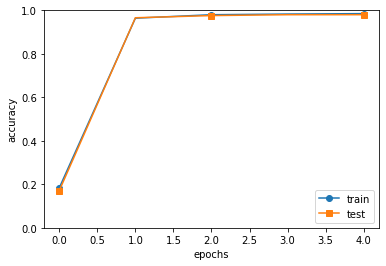

In [20]:
# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
